# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera
from skimage.filters import roberts, sobel,sobel_h,sobel_v, scharr, prewitt
from skimage import feature
import skimage

from scipy.signal import convolve2d


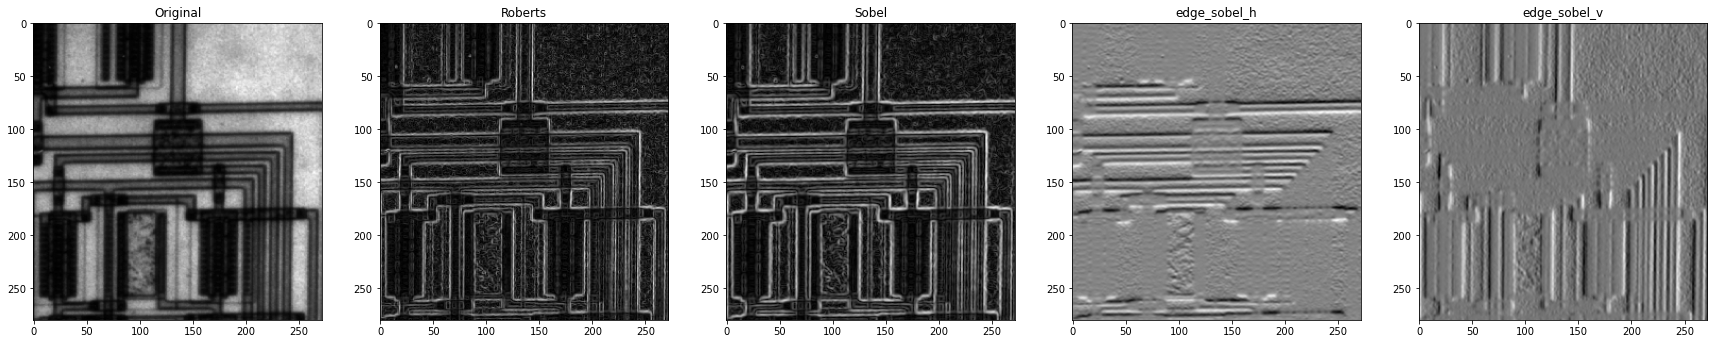

In [3]:
# 1. Built-in Sobel, Prewill, Roberts, Canny
image = io.imread('circuit.tif')
edge_roberts = roberts(image)
edge_sobel = sobel(image)
edge_sobel_v = sobel_v(image)
edge_sobel_h = sobel_h(image)
edgesCannySigma1 = feature.canny(image,high_threshold=200,low_threshold=30)
edgesCannySigma1_1 = feature.canny(image,high_threshold=100,low_threshold=10)
edgesCannySigma3 = feature.canny(image, sigma=3,high_threshold=200,low_threshold=50)
edgesCannySigma3_3 = feature.canny(image, sigma=3,high_threshold=100,low_threshold=10)

show_images([image, edge_roberts, edge_sobel,edge_sobel_h,edge_sobel_v], ['Original', 'Roberts', 'Sobel',"edge_sobel_h","edge_sobel_v"])




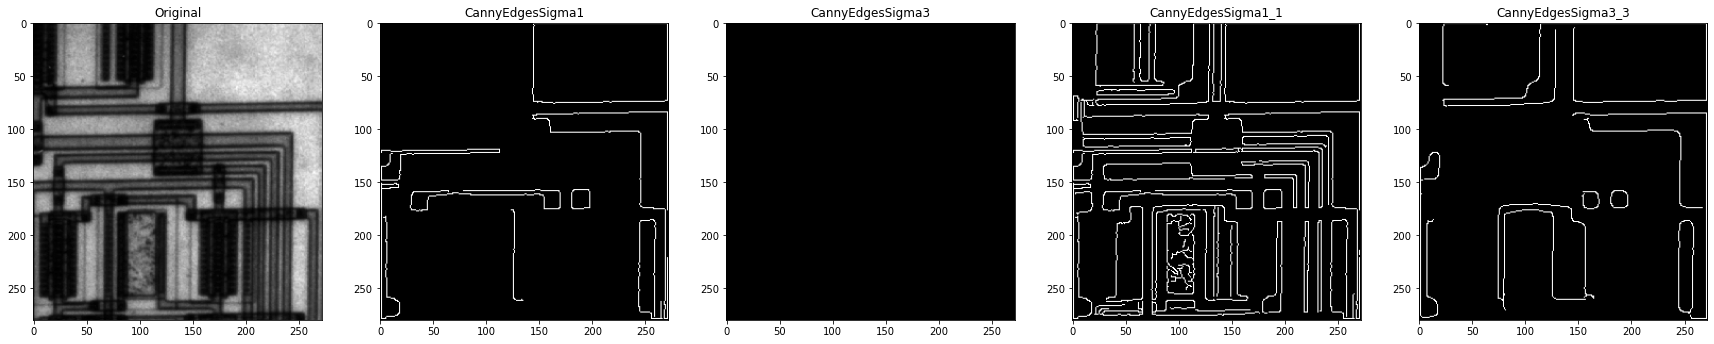

In [4]:
show_images([image, edgesCannySigma1, edgesCannySigma3,edgesCannySigma1_1, edgesCannySigma3_3], ['Original', "CannyEdgesSigma1", "CannyEdgesSigma3","CannyEdgesSigma1_1", "CannyEdgesSigma3_3"])


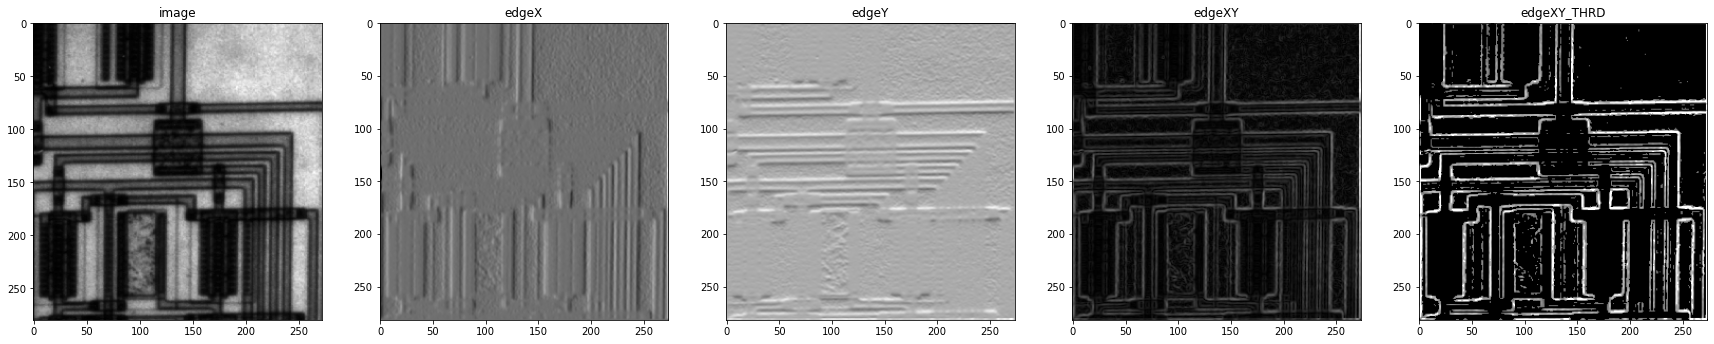

In [5]:
# 2. Custom Sobel (V-H-Both)
image = io.imread('circuit.tif')
hx = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])
hy = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])
edgeX = convolve2d(image,hx)
edgeY = convolve2d(image,hy)
edgeXY = np.sqrt(edgeX**2 + edgeY**2)
THRD = 100
edgeXY_THRD = np.copy(edgeXY)
edgeXY_THRD[edgeXY<THRD] = 0
edgeXY_THRD[edgeXY>THRD+100] = 255
show_images([image,edgeX,edgeY,edgeXY,edgeXY_THRD],['image','edgeX','edgeY','edgeXY','edgeXY_THRD'])

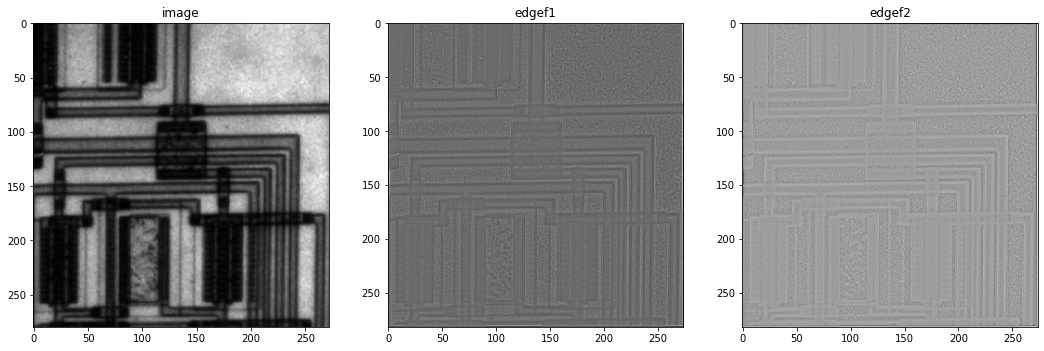

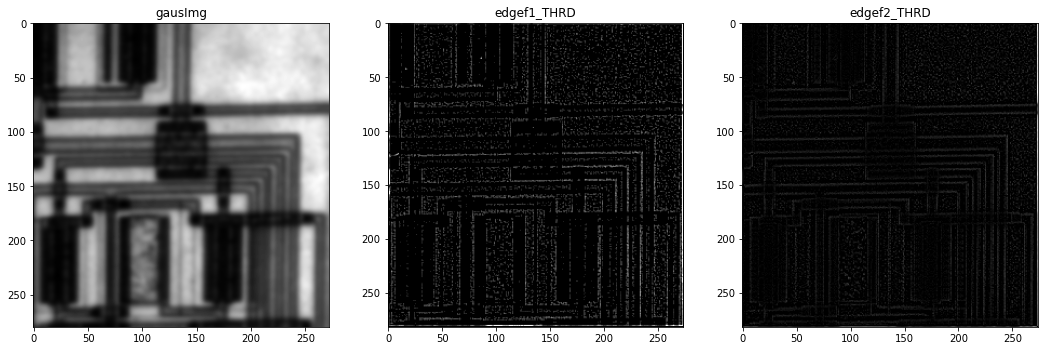

In [7]:
# 3. Custom LoG
F1 = np.array([[-1,-1,-1],
               [-1,8,-1],
               [-1,-1,-1]])
F2 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
gimage3 = skimage.filters.gaussian(image,sigma=2)*255
edgef1 = convolve2d(image,F1)
edgef2 = convolve2d(image,F2)

THRD = 20
edgef1_THRD = np.copy(edgef1)
edgef1_THRD[edgef1<THRD+10] = 0
edgef1_THRD[edgef1>THRD+180] = 255

edgef2_THRD = np.copy(edgef2)
edgef2_THRD[edgef2<THRD-20] = 0
edgef2_THRD[edgef2>THRD+210] = 255

show_images([image,edgef1,edgef2],['image','edgef1','edgef2'])
show_images([gimage3,edgef1_THRD,edgef2_THRD],['gausImg','edgef1_THRD','edgef2_THRD'])

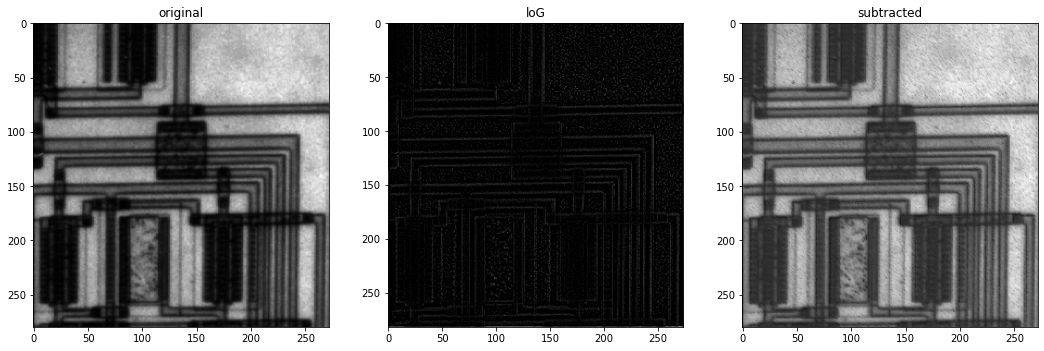

In [8]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
loG = np.copy(edgef2_THRD)
loG = loG*0.9

show_images([image,loG,np.subtract(image,loG[:image.shape[0],:image.shape[1]])],['original','loG','subtracted'])
